In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
traindata = pd.read_csv('train_FD001.txt',sep=' ',header = None)
testdata = pd.read_csv('test_FD001.txt',sep=' ',header = None)
RULdata = pd.read_csv('RUL_FD001.txt',sep=' ',header = None)

In [3]:
columns = {0:'engineNumber',1:'cycleNumber',2:'opSetting1',3:'opSetting2',4:'opSetting3',5:'sensor1',6:'sensor2',
           7:'sensor3',8:'sensor4',9:'sensor5',10:'sensor6',11:'sensor7',12:'sensor8',13:'sensor9',14:'sensor10',
           15:'sensor11',16:'sensor12',17:'sensor13',18:'sensor14',19:'sensor15',20:'sensor16',
           21:'sensor17',22:'sensor18',23:'sensor19',24:'sensor20',25:'sensor21'}

In [4]:
train_data = traindata.rename(columns=columns)
test_data = testdata.rename(columns=columns)
true_rul = RULdata.rename(columns={0: 'RUL'})

In [5]:
num_cycles_to_failure = train_data.groupby('engineNumber')['cycleNumber'].count()
num_cycles_to_failure


engineNumber
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: cycleNumber, Length: 100, dtype: int64

# Train data

In [6]:
selcted_train_data = pd.DataFrame([train_data['sensor2'],train_data['sensor3'],train_data['sensor4'],train_data['sensor7'],train_data['sensor8'],train_data['sensor9'],train_data['sensor11'],train_data['sensor12'],train_data['sensor13'],train_data['sensor15'],train_data['sensor17'],train_data['sensor20'],train_data['sensor21']])
selected_train_data =selcted_train_data.transpose()
selected_train_data

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392.0,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392.0,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390.0,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392.0,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397.0,38.49,22.9735
20627,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395.0,38.30,23.1594
20628,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398.0,38.44,22.9333
20629,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395.0,38.29,23.0640


In [7]:
object = StandardScaler()
scaled_train_data = object.fit_transform(selected_train_data)
scaled_train_data = pd.DataFrame(scaled_train_data)
scaled_train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.603816,-0.781710,1.348493,1.194427
1,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.275852,-0.781710,1.016528,1.236922
2,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.649144,-2.073094,0.739891,0.503423
3,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-1.971665,-0.781710,0.352598,0.777792
4,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.339845,-0.136018,0.463253,1.059552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,1.618000,1.216258,2.188375,-2.189329,1.315066,0.012547,1.980044,-2.607969,2.278282,1.425294,2.446751,-1.805173,-2.921113
20627,1.717992,2.279706,2.738351,-2.833345,1.878576,-0.006020,1.867718,-2.350355,1.722087,1.913240,1.155367,-2.856395,-1.203764
20628,1.478011,1.946971,2.138377,-2.742957,2.019453,0.029755,2.054927,-1.902919,2.000184,3.265092,3.092444,-2.081810,-3.292481
20629,1.098043,2.403666,1.955051,-3.036719,2.160330,0.383884,3.178182,-2.363913,1.861136,2.579834,1.155367,-2.911722,-2.085072


In [8]:
EOL = []
for sl_no in train_data['engineNumber']:
    EOL.append( ( (train_data[train_data['engineNumber'] == sl_no]['cycleNumber']).values)[-1])

In [9]:
Y = EOL-train_data['cycleNumber']
Y

0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: cycleNumber, Length: 20631, dtype: int64

# Test Data

In [10]:
selcted_test_data = pd.DataFrame([test_data['sensor2'],test_data['sensor3'],test_data['sensor4'],test_data['sensor7'],test_data['sensor8'],test_data['sensor9'],test_data['sensor11'],test_data['sensor12'],test_data['sensor13'],test_data['sensor15'],test_data['sensor17'],test_data['sensor20'],test_data['sensor21']])
selected_test_data =selcted_test_data.transpose()
selected_test_data

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392.0,38.86,23.3735
1,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393.0,39.02,23.3916
2,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393.0,39.08,23.4166
3,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391.0,39.00,23.3737
4,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394.0,38.65,23.1974
13092,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395.0,38.57,23.2771
13093,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395.0,38.62,23.2051
13094,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8.4711,395.0,38.66,23.2699


In [11]:
object = StandardScaler()
scaled_test_data = object.fit_transform(selected_test_data)
scaled_test_data = pd.DataFrame(scaled_test_data)
scaled_test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.359276,-0.561495,-0.975674,0.209138,-0.539078,-0.720312,-1.103591,-0.049542,-0.720590,-0.711659,-0.463406,-0.229408,0.448866
1,-1.908502,0.070116,-1.392836,1.603612,-1.061366,-0.348673,0.427727,0.736727,-0.193647,-1.570037,0.347276,0.899934,0.664042
2,-0.037636,-0.231698,-0.507676,0.517390,-0.364982,-0.126564,0.427727,0.397202,-0.720590,0.629340,0.347276,1.323438,0.961247
3,-0.087526,-0.795350,0.251888,0.458675,-0.713174,-1.147041,-0.695239,-0.657113,-0.369295,-1.177045,-1.274088,0.758766,0.451244
4,0.087088,-0.181729,-0.420954,0.590783,-1.061366,-1.211750,-0.542108,0.718857,-0.720590,-0.784053,-2.084769,0.688182,0.918450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,1.908063,2.268760,1.652893,-0.510118,-0.887270,7.342072,1.397561,-1.890124,-1.247533,1.573900,1.157958,-1.711671,-1.644645
13092,1.858174,1.517224,2.588890,-0.789013,-0.364982,7.194290,0.938166,-1.246814,0.333296,0.874098,1.968639,-2.276342,-0.697156
13093,2.406961,1.009537,0.311696,-1.053229,0.679594,7.730325,0.785034,-1.014507,-0.544942,1.070594,1.968639,-1.923422,-1.553106
13094,1.957953,1.377310,2.186681,-0.568833,-0.016790,7.908712,0.989210,-0.746461,0.157648,1.560111,1.968639,-1.641087,-0.782751


In [12]:
EOL2=true_rul.drop([1],axis = 'columns')
EOL2

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [13]:
num_cycles_to_failure2 = test_data.groupby('engineNumber')['cycleNumber'].count()
num_cycles_to_failure2

engineNumber
1       31
2       49
3      126
4      106
5       98
      ... 
96      97
97     134
98     121
99      97
100    198
Name: cycleNumber, Length: 100, dtype: int64

In [14]:
nctf = np.array(num_cycles_to_failure2)


In [15]:
EOL2['nofcyc'] = nctf
EOL2

,RUL,nofcyc
0,112,31
1,98,49
2,69,126
3,82,106
4,91,98
...,...,...
95,137,97
96,82,134
97,59,121
98,117,97


In [16]:
EOL2['total'] = EOL2['RUL'] + EOL2['nofcyc']
EOL2

,RUL,nofcyc,total
0,112,31,143
1,98,49,147
2,69,126,195
3,82,106,188
4,91,98,189
...,...,...,...
95,137,97,234
96,82,134,216
97,59,121,180
98,117,97,214


In [17]:
EOL3 = []
for sl_no in test_data['engineNumber']:
    EOL3.append( ( (test_data[test_data['engineNumber'] == sl_no]['cycleNumber']).values)[-1])
    
EOL3

[31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,
 126,


In [18]:
subdata1 = pd.DataFrame(test_data['engineNumber'])
subdata1

,engineNumber
0,1
1,1
2,1
3,1
4,1
...,...
13091,100
13092,100
13093,100
13094,100


In [19]:
EOL5 =[]
# for i in range(1,101) :
for i in subdata1['engineNumber']:
    EOL5.append(EOL2['total'][i-1])
EOL5

[143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 143,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 147,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195,
 195

In [20]:
EOL6 = EOL5 - test_data['cycleNumber']
EOL6

0        142
1        141
2        140
3        139
4        138
        ... 
13091     24
13092     23
13093     22
13094     21
13095     20
Name: cycleNumber, Length: 13096, dtype: int64

# Modelling


# SVR

In [30]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [31]:
base_model = SVR()

In [32]:
base_model.fit(scaled_train_data,Y)


SVR()

In [33]:
base_preds = base_model.predict(scaled_test_data)

In [34]:
mean_squared_error(EOL6,base_preds)

4662.255606863715

In [35]:
# param_grid = {'kernel':['linear','rbf','poly'],
#               'gamma':['scale','auto'],
param_grid = {'degree':[2,3],
              'epsilon':[1,2]}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [38]:
grid.fit(scaled_train_data,Y)


GridSearchCV(estimator=SVR(), param_grid={'degree': [2, 3], 'epsilon': [1, 2]})

In [39]:
grid.best_params_

{'degree': 2, 'epsilon': 2}

In [40]:
grid_preds = grid.predict(scaled_test_data)

In [41]:
np.sqrt(mean_squared_error(EOL6,grid_preds))

68.21486186956363

In [42]:
r_score(EOL6,grid_preds)

NameError: name 'r_score' is not defined

In [38]:
from scipy.signal import savgol_filter

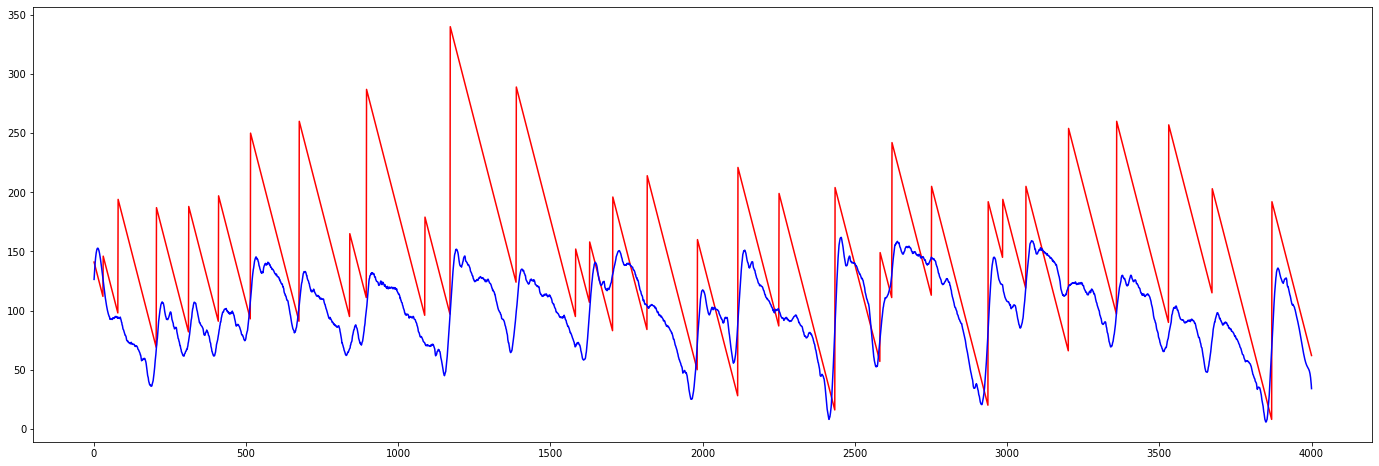

In [46]:
yhat = savgol_filter(grid_preds[1:4001], 101, 7) 
xarray=np.array((np.arange(1,4001,1)))
plt.figure(figsize=(24,8))
# plt.plot(xarray,grid_preds[1:4001])
plt.plot(xarray,EOL6[1:4001],color ='red')
plt.plot(xarray,yhat,color = 'blue')

# RFR with LDA

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [48]:
LDA = LinearDiscriminantAnalysis(n_components=1)

In [49]:
model2 = LDA.fit(scaled_train_data,Y)

In [22]:
LDA = LinearDiscriminantAnalysis(n_components=1)
X_train = LDA.fit_transform(selected_train_data,Y)
X_test = LDA.transform(selected_test_data)

In [23]:
model3 = RandomForestRegressor(n_estimators=20)
model3.fit(X_train,Y)



RandomForestRegressor(n_estimators=20)

In [24]:
RFR_pred = model3.predict(X_test)

In [25]:
np.sqrt(mean_squared_error(EOL6,RFR_pred))

58.54964353622313

In [27]:
r2_score(EOL6,RFR_pred)

0.014468618327565297

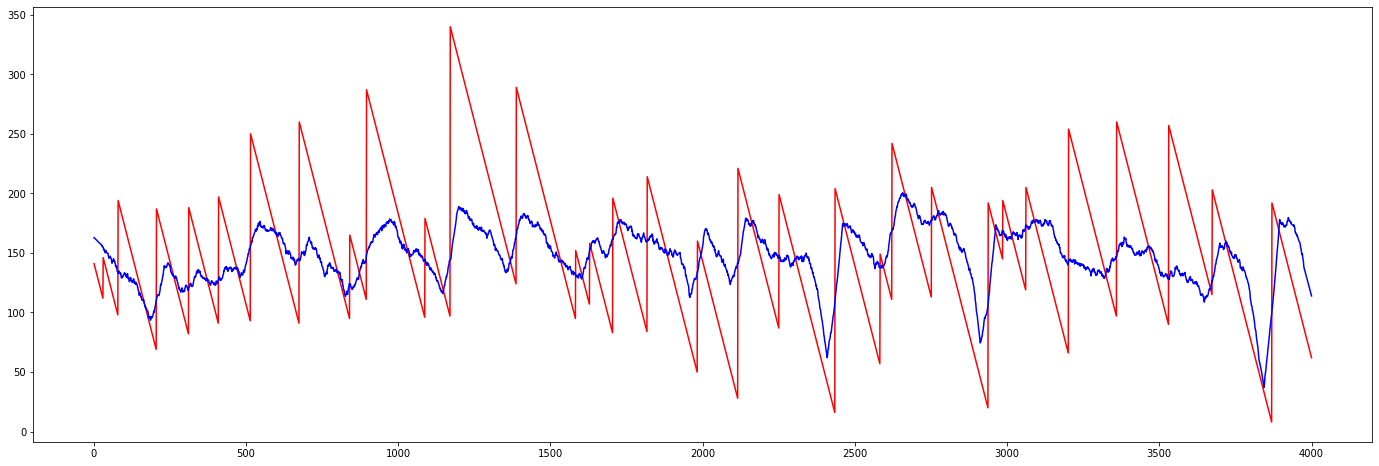

In [61]:
yhat_rfr = savgol_filter(RFR_pred[1:4001], 51, 1) 
xarray=np.array((np.arange(1,4001,1)))
plt.figure(figsize=(24,8))
# plt.plot(xarray,grid_preds[1:4001])
plt.plot(xarray,EOL6[1:4001],color ='red')
plt.plot(xarray,yhat_rfr,color = 'blue')

# SVR with LDA

In [62]:
X_train_svr_lda = LDA.fit_transform(selected_train_data,Y)
X_test_svr_lda = LDA.transform(selected_test_data)

In [63]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [64]:
svr1 = SVR()
grid1 = GridSearchCV(svr1,param_grid=param_grid)

In [ ]:
grid1.fit(X_train_svr_lda,Y)

In [ ]:
grid_with_best = grid.best_estimator_
grid_with_best

In [ ]:
grid_preds_svr_lda = grid_with_best.predict(X_test_svr_lda)

In [ ]:
np.sqrt(mean_squared_error(EOL6,grid_preds_svr_lda))

In [ ]:
yhat_svr_lda = savgol_filter(grid_preds_svr_lda[1:4001], 31, 5) 
xarray=np.array((np.arange(1,4001,1)))
plt.figure(figsize=(24,8))
# plt.plot(xarray,grid_preds[1:4001])
plt.plot(xarray,EOL6[1:4001],color ='red')
plt.plot(xarray,yhat_svr_lda,color = 'blue')

# RFR With QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
qda = QuadraticDiscriminantAnalysis()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor()

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,Y)


In [ ]:
rf_optimal_model = rf_random.best_estimator_
rf_optimal_model
# make predictions for test data


In [ ]:
RFR_grid_preds = rf_optimal_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(EOL6,RFR_grid_preds))

In [ ]:
yhat_RFR_grid = savgol_filter(RFR_grid_preds[1:4001], 31, 5) 
xarray=np.array((np.arange(1,4001,1)))
plt.figure(figsize=(24,8))
# plt.plot(xarray,grid_preds[1:4001])
plt.plot(xarray,EOL6[1:4001],color ='red')
plt.plot(xarray,yhat_RFR_grid,color = 'blue')